In [11]:
# 引入必要的库函数
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

要使用的公式为：
$$F(x,y)=3(1-x)^2e^{-(x^2)-(y+1)^2}\frac{10}{5}(x^3-xy^5)e^{-x^2-y^2}\frac{1}{3}e^{-(x+1)^2-y^2}$$
求其最大最小值


In [12]:
# 定义函数
def F(x, y):
	return 3*(1-x)**2*np.exp(-(x**2)-(y+1)**2)- 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2)- 1/3**np.exp(-(x+1)**2 - y**2)

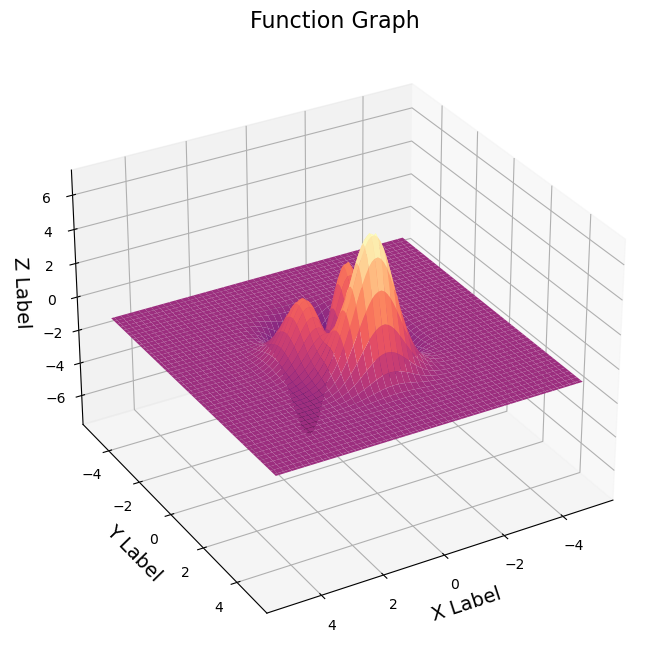

In [13]:
# 创建数据
x = np.linspace(-5,5,100) # 生成 -5 到 5 之间的 100 个数
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y) # 生成网格矩阵，X 为 x 的网格矩阵，Y 为 y 的网格矩阵
Z = F(X,Y)

# 创建 3D 图形
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# 绘图 
surf = ax.plot_surface(X, Y, Z, cmap='magma', linewidth=0.1, antialiased=True)

# 调整视角
ax.view_init(30, 60)

# 添加轴标签和标题
ax.set_xlabel('X Label', fontsize=14)
ax.set_ylabel('Y Label', fontsize=14)
ax.set_zlabel('Z Label', fontsize=14)
ax.set_title('Function Graph', fontsize=16)

# 显示图像
plt.show()


In [14]:
# 一些参数
DNA_SIZE = 24           # DNA 的长度
POP_SIZE = 200          # 种群的大小
CROSSOVER_RATE = 0.8    # 交叉概率
MUTATION_RATE = 0.005   # 变异概率
N_GENERATIONS = 50      # 迭代次数
X_BOUND = [-3, 3]       # x 轴的范围
Y_BOUND = [-3, 3]       # y 轴的范围

In [15]:
def plot_3d(ax):

	X = np.linspace(*X_BOUND, 100)
	Y = np.linspace(*Y_BOUND, 100)
	X,Y = np.meshgrid(X, Y)
	Z = F(X, Y)
	ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.coolwarm)
	ax.set_zlim(-10,10)
	ax.set_xlabel('x')
	ax.set_ylabel('y')
	ax.set_zlabel('z')
	plt.pause(3)
	plt.show()

In [16]:
def translateDNA(pop): #pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目
	x_pop = pop[:,1::2]#奇数列表示X
	y_pop = pop[:,::2] #偶数列表示y
	
	#pop:(POP_SIZE,DNA_SIZE)*(DNA_SIZE,1) --> (POP_SIZE,1)
	x = x_pop.dot(2**np.arange(DNA_SIZE)[::-1])/float(2**DNA_SIZE-1)*(X_BOUND[1]-X_BOUND[0])+X_BOUND[0]
	y = y_pop.dot(2**np.arange(DNA_SIZE)[::-1])/float(2**DNA_SIZE-1)*(Y_BOUND[1]-Y_BOUND[0])+Y_BOUND[0]
	return x,y

In [17]:
def get_fitness(pop): 
    x,y = translateDNA(pop)
    pred = F(x, y)
    return (pred - np.min(pred)) + 1e-3 
#减去最小的适应度是为了防止适应度出现负数，通过这一步fitness的范围为[0, np.max(pred)-np.min(pred)],最后在加上一个很小的数防止出现为0的适应度

In [18]:
def crossover_and_mutation(pop, CROSSOVER_RATE = 0.8):
	new_pop = []
	for father in pop:		#遍历种群中的每一个个体，将该个体作为父亲
		child = father		#孩子先得到父亲的全部基因（这里我把一串二进制串的那些0，1称为基因）
		if np.random.rand() < CROSSOVER_RATE:			#产生子代时不是必然发生交叉，而是以一定的概率发生交叉
			mother = pop[np.random.randint(POP_SIZE)]	#再种群中选择另一个个体，并将该个体作为母亲
			cross_points = np.random.randint(low=0, high=DNA_SIZE*2)	#随机产生交叉的点
			child[cross_points:] = mother[cross_points:]		#孩子得到位于交叉点后的母亲的基因
		mutation(child)	#每个后代有一定的机率发生变异
		new_pop.append(child)

	return new_pop

In [19]:
def mutation(child, MUTATION_RATE=0.003):
	if np.random.rand() < MUTATION_RATE: 				#以MUTATION_RATE的概率进行变异
		mutate_point = np.random.randint(0, DNA_SIZE*2)	#随机产生一个实数，代表要变异基因的位置
		child[mutate_point] = child[mutate_point]^1 	#将变异点的二进制为反转

In [20]:
def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=(fitness)/(fitness.sum()) )
    return pop[idx]

In [21]:
def print_info(pop):
	fitness = get_fitness(pop)
	max_fitness_index = np.argmax(fitness)
	print("max_fitness:", fitness[max_fitness_index])
	x,y = translateDNA(pop)
	print("最优的基因型：", pop[max_fitness_index])
	print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))


C:\Users\Ocean\AppData\Local\Temp\ipykernel_11128\1807484156.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


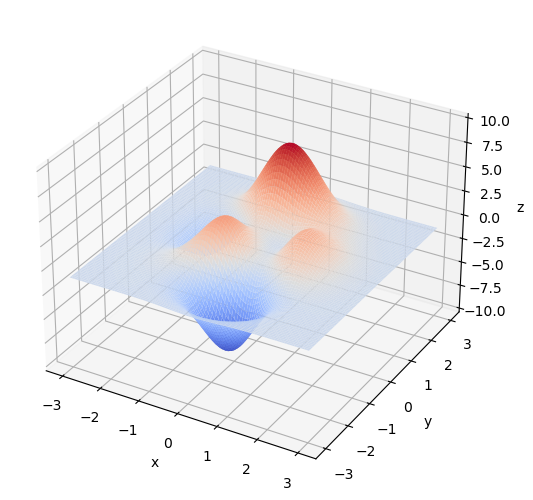

max_fitness: 0.0024173417705691804
最优的基因型： [1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0
 0 0 1 1 1 1 0 1 1 0 0]
(x, y): (0.0068988208114397764, 1.499982386826419)


In [22]:
if __name__ == "__main__":
	fig = plt.figure()
	ax = Axes3D(fig)	
	plt.ion()#将画图模式改为交互模式，程序遇到plt.show不会暂停，而是继续执行
	plot_3d(ax)

	pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE*2)) #matrix (POP_SIZE, DNA_SIZE)
	for _ in range(N_GENERATIONS):#迭代N代
		x,y = translateDNA(pop)
		if 'sca' in locals(): 
			sca.remove()
		sca = ax.scatter(x, y, F(x,y), c='black', marker='o');plt.show();plt.pause(0.1)
		pop = np.array(crossover_and_mutation(pop, CROSSOVER_RATE))
		#F_values = F(translateDNA(pop)[0], translateDNA(pop)[1])#x, y --> Z matrix
		fitness = get_fitness(pop)
		pop = select(pop, fitness) #选择生成新的种群
	
	print_info(pop)
	plt.ioff()
	plot_3d(ax)
